# Part 1: Data Loading and Initial Exploration (15 pts)

In this section, we import the data and perform EDA.  
Before starting the analysis, we first created the conda environment with the provided yaml file in the terminal. (conda env create -f environment.yml)

## Basic Imports and Plot Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

## 1.1 Read Data

We load the dataset into a pandas dataframe.

In [2]:
sou = pd.read_csv("data/SOTU.csv")
sou["Year"] = sou["Year"].astype(int)

sou.head()

,President,Year,Text,Word Count
0,Joseph R. Biden,2024,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020,\nThe President. Thank you very much. Thank yo...,6169


## 1.2 Exploratory Data Analysis

### 1.2.1 Number of Speeches per President

Here, we count the number of speeches per president, reorder them to match the dataset’s original president order, and visualize the results with a bar chart.

In [3]:
speeches_per_pres = sou["President"].value_counts()

pres_order = sou["President"].drop_duplicates()
speeches_per_pres = speeches_per_pres.reindex(pres_order)

speeches_per_pres

President
Joseph R. Biden           4
Donald J. Trump           4
Barack Obama              8
George W. Bush            8
William J. Clinton        8
George Bush               4
Ronald Reagan             8
Jimmy Carter              7
Gerald R. Ford            3
Richard M. Nixon          6
Lyndon B. Johnson         6
John F. Kennedy           3
Dwight D. Eisenhower     10
Harry S Truman            8
Franklin D. Roosevelt    11
Herbert Hoover            4
Calvin Coolidge           6
Warren G. Harding         2
Woodrow Wilson            8
William Howard Taft       4
Theodore Roosevelt        8
William McKinley          4
Grover Cleveland          8
Benjamin Harrison         4
Chester A. Arthur         4
Rutherford B. Hayes       4
Ulysses S. Grant          8
Andrew Johnson            4
Abraham Lincoln           4
James Buchanan            4
Franklin Pierce           4
Millard Fillmore          3
Zachary Taylor            1
James K. Polk             4
John Tyler                4
Martin Van

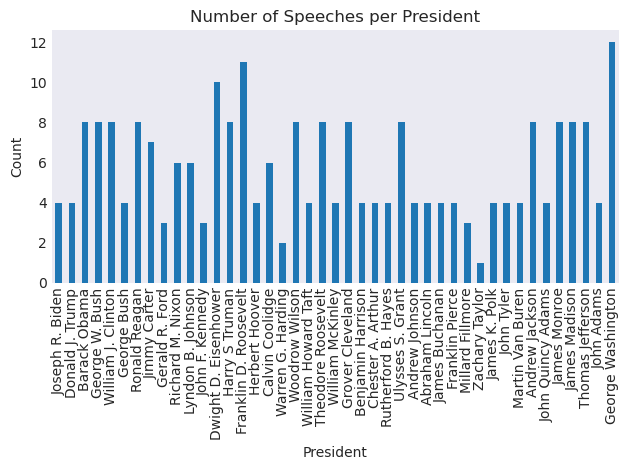

In [4]:
ax = speeches_per_pres.plot(kind="bar")

ax.set_title("Number of Speeches per President")
ax.set_ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()

plt.savefig("outputs/P01_figure_1.png")

### 1.2.2 Number of Speeches per Year

We count the number of speeches given each year, sort them in chronological order, and plot the yearly trend as a line chart.

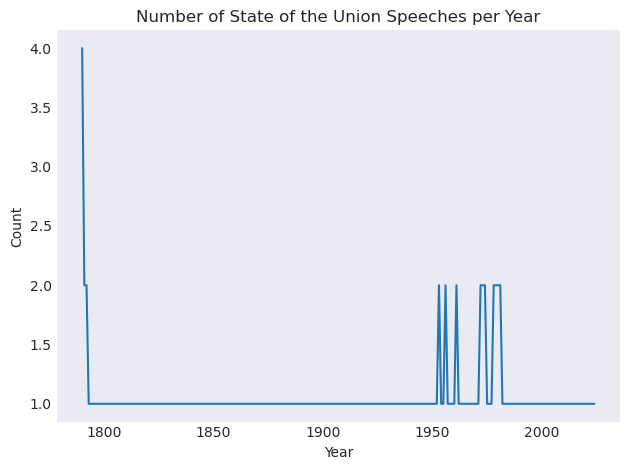

In [5]:
speeches_per_year = sou["Year"].value_counts().sort_index()

ax = speeches_per_year.plot()
ax.set_title("Number of State of the Union Speeches per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Count")
plt.tight_layout()

plt.savefig("outputs/P01_figure_2.png")

### 1.2.3 Word Count Distribution

We visualize the distribution of speech lengths by plotting a histogram of word counts across all State of the Union speeches.

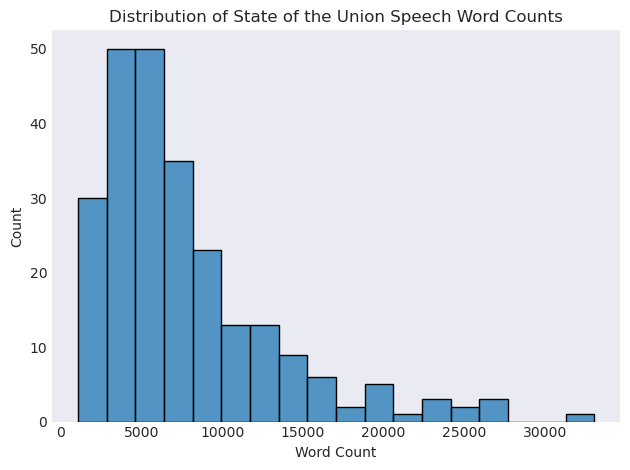

In [6]:
sns.histplot(data=sou, x="Word Count", bins=18)

plt.title("Distribution of State of the Union Speech Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("outputs/P01_figure_3.png")

### 1.2.4 Word Count Distribution over Year

We explore the relationship between speech length and time by plotting a scatterplot of word count vs. year, with rug plots added to show the marginal distributions along each axis.

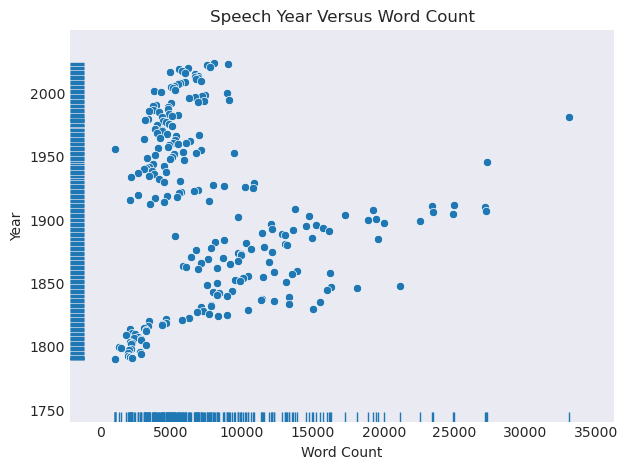

In [7]:
sns.scatterplot(data=sou, x="Word Count", y="Year")

sns.rugplot(data=sou, x="Word Count")
sns.rugplot(data=sou, y="Year", color="#1f77b4") # changed color to match original plot

plt.title("Speech Year Versus Word Count")
plt.xlabel("Word Count")
plt.ylabel("Year")
plt.tight_layout()

plt.savefig("outputs/P01_figure_4.png")

### 1.2.5 Word Count Distribution per President

We compute each president’s average speech length, reorder the results to match the dataset’s president order, and visualize the averages using a bar chart.

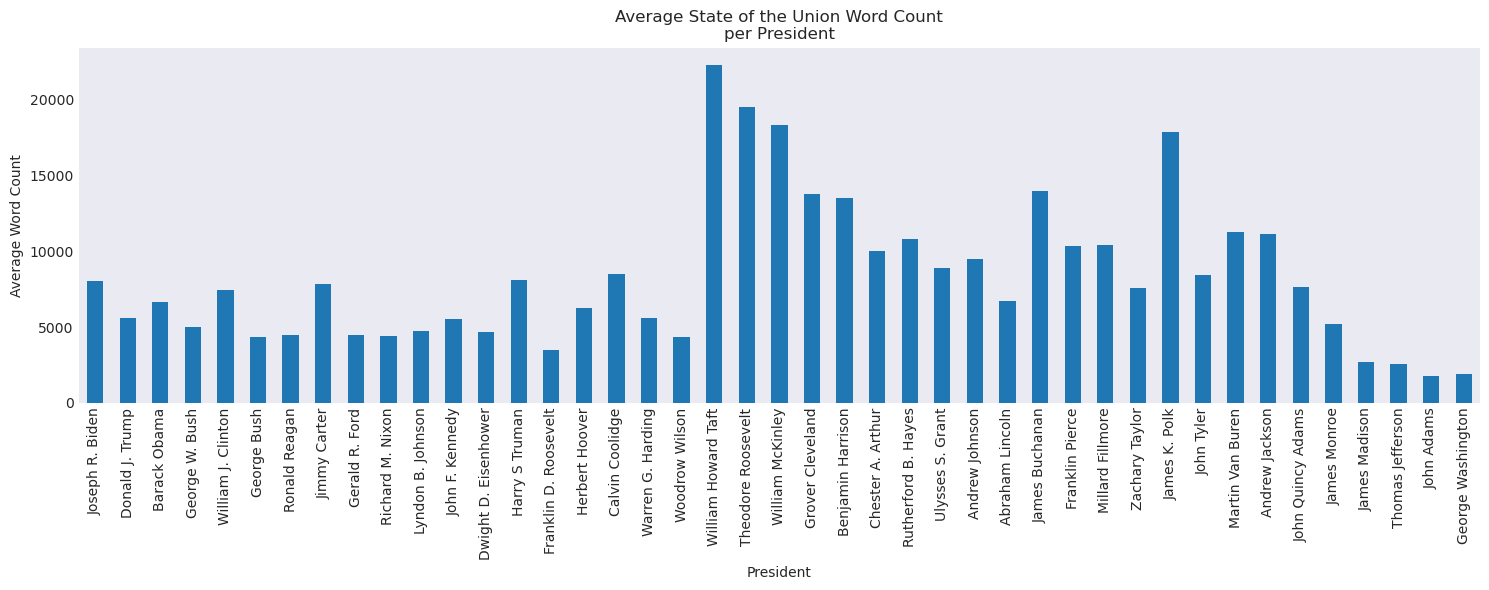

In [8]:
plt.figure(figsize=(15, 6))

avg_words_pres = sou.groupby("President")["Word Count"].mean()

avg_words_pres = avg_words_pres.reindex(pres_order)

ax = avg_words_pres.plot(kind="bar")

ax.set_title("Average State of the Union Word Count\nper President")
ax.set_ylabel("Average Word Count")
plt.xticks(fontsize=10, rotation=90)
plt.tight_layout()

plt.savefig("outputs/P01_figure_5.png")

## 1.3 Commentary on My Findings

For Number of Speeches per President, I first looked at how the State of the Union speeches are distributed across presidents and years. The bar chart of speeches per president shows that the number of addresses varies a lot by president. The histogram shows that modern presidents tend to have more addresses than previous presidents but there is an exception which is George Washington, who has the most addresses. Additionally, by looking at the chart, I found that the two presidents with the most speeches are FDR and George Washington. Those two held their presidency during the hardest time of the United States, for instance, FDR held presidency during the Great Depression and World War II, and George Washington held presidency during the Revolutionary War. So, maybe there are some correlation between unstable periods and number of speeches. Next, I examined the length of the speeches. The histogram of word counts indicates that speech length is not uniform: most SOTUs fall within a moderate range of word counts, with a smaller number of very long speeches producing a right-skewed distribution. Finally, I examined the average state of the Union Word count per president, and I found that those presidents before and including William Howard Taft tend to have more word counts than those after Taft.